In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *

pd.options.mode.chained_assignment = None  # Disable the warning

pressure=1
# diffusion="0.0percent"
# diffusion="nodiff"
diffusion="5.0percent"
file_id = "1"
# diffusion = "next1t"

diff_name = f"_{diffusion}"
if diff_name == "_nodiff":
    diff_name=""

# hits_true = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_{pressure}bar_EFilt_smear_{file_id}.h5", "MC/hits")
# hits      = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_{pressure}bar_EFilt{diff_name}_smear_{file_id}.h5", "MC/hits")


# hits_true = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_1bar_Efilt_optimizer.h5", "MC/hits")
# hits      = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_1bar_Efilt_5.0percent_smear_1_optimizer.h5", "MC/hits")


hits_true = pd.read_hdf(f"../data/ATPC_Tl/ATPC_Tl_ion_1bar_nexus_2267.h5", "MC/hits")
hits      = pd.read_hdf(f"../data/ATPC_Tl/ATPC_Tl_ion_1bar_Efilt_5.0percent_smear_2267.h5", "MC/hits")



display(hits)

event_list = hits.event_id.unique()

print(hits.event_id.unique())

,event_id,x,y,z,energy
0,4536000009,2492.830811,700.830750,2528.0,0.000403
1,4536000009,2492.830811,708.830750,2528.0,0.000374
2,4536000009,2500.830811,700.830750,2528.0,0.000921
3,4536000009,2500.830811,708.830750,2528.0,0.000892
4,4536000009,2492.830811,700.830750,2536.0,0.002274
...,...,...,...,...,...
453807,4536001518,-1827.169312,2180.830811,2312.0,0.000461
453808,4536001518,-1827.169312,2188.830811,2312.0,0.000281
453809,4536001518,-1819.169312,2204.830811,2312.0,0.000358
453810,4536001518,-1811.169312,2196.830811,2312.0,0.000307


[4536000009 4536000013 4536000015 4536000024 4536000026 4536000037
 4536000046 4536000057 4536000065 4536000068 4536000092 4536000109
 4536000113 4536000115 4536000119 4536000123 4536000152 4536000167
 4536000168 4536000181 4536000204 4536000214 4536000231 4536000239
 4536000251 4536000267 4536000268 4536000275 4536000297 4536000308
 4536000309 4536000315 4536000327 4536000329 4536000352 4536000355
 4536000357 4536000361 4536000377 4536000380 4536000396 4536000399
 4536000403 4536000408 4536000410 4536000418 4536000421 4536000428
 4536000430 4536000432 4536000441 4536000445 4536000452 4536000455
 4536000466 4536000485 4536000495 4536000497 4536000508 4536000514
 4536000520 4536000530 4536000537 4536000539 4536000541 4536000555
 4536000561 4536000564 4536000568 4536000576 4536000582 4536000620
 4536000634 4536000652 4536000678 4536000679 4536000695 4536000705
 4536000734 4536000735 4536000736 4536000742 4536000748 4536000758
 4536000774 4536000776 4536000783 4536000795 4536000797 453600

In [257]:
# eid=9844
eid=event_list[6]

data = hits[hits.event_id ==eid]
data_true = hits_true[hits_true.event_id ==eid]
display(data_true)

print(data.energy.sum())
print(data_true.energy.sum())

,event_id,x,y,z,energy,particle_id,n
245179,4536000046,1007.600342,598.689636,-42.397175,0.000023,24,0
245180,4536000046,173.038803,488.427307,884.761963,0.000164,24,1
245181,4536000046,667.861511,1140.364258,655.473145,0.000205,24,12
245182,4536000046,667.861023,1140.364624,655.473572,0.000021,51,1
245183,4536000046,667.860596,1140.364136,655.472595,0.000032,50,0
...,...,...,...,...,...,...,...
250436,4536000046,976.034851,598.350220,-52.970173,0.000171,428,10
250437,4536000046,976.032104,598.360168,-52.958214,0.000765,428,32
250438,4536000046,976.031433,598.369690,-52.955505,0.000176,428,9
250439,4536000046,976.038391,598.368042,-52.960445,0.001305,428,50


2.434864
2.439973


In [258]:
hits.describe()

,event_id,x,y,z,energy
count,4.538120e+05,453812.000000,453812.000000,453812.000000,453812.000000
mean,4.536001e+09,-133.196960,-22.249987,3551.732910,0.000992
std,4.431160e+02,1342.018921,1423.652466,1436.091431,0.001493
min,4.536000e+09,-3035.169189,-3019.169189,8.000000,0.000228
25%,4.536000e+09,-1123.169312,-1163.169312,2608.000000,0.000380
50%,4.536001e+09,-155.169281,12.830725,3680.000000,0.000596
75%,4.536001e+09,852.830750,1180.830688,4752.000000,0.001026
max,4.536002e+09,3036.830811,3092.830811,6184.000000,0.082528


In [259]:

Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist, voxel_size, det_size  = InitializeParams(pressure, diffusion)
# voxel_sf=1.1
# energy_threshold=0
print("Diffussion smear is: ",        Diff_smear,            "mm/sqrt(cm)")
print("Energy threshold is: ",        1000*energy_threshold, "keV")
print("diffision scale factor is: ",  diff_scale_factor)
print("Radius scale factor is: ",     radius_sf)
print("Hit grouping factor is: ",     group_sf)
print("Tortuosity distance scale is:", Tortuosity_dist)
print("The voxel size is:",           voxel_size)
print("The det_size is", det_size)

data_true["z"]=data_true["z"]+det_size


# diff_scale_factor = 5
mean_sigma = diff_scale_factor*Diff_smear*np.sqrt(0.1*data.z.mean())

# The expected diffusion is less than vox size so replace
if (mean_sigma < 1.5*voxel_size):
    mean_sigma = 1.5*voxel_size


if (diffusion == "next1t"):
    mean_sigma=6
elif (diffusion == "nodiff"):
    mean_sigma=10/np.sqrt(pressure)

print("Mean sigma", mean_sigma)

# Create the bins ---- 
xbw  = mean_sigma
xmin = -det_size - mean_sigma/2 
xmax = det_size  + mean_sigma/2

ybw  = mean_sigma
ymin = -det_size - mean_sigma/2 
ymax = det_size  + mean_sigma/2

# This shifts the z pos of the events so 0 is at anode
# can set this to zero
z_shift = det_size
# z_shift = 0

zbw=mean_sigma
zmin=-det_size + z_shift - mean_sigma/2 
zmax=det_size + z_shift + mean_sigma/2

# bins for x, y, z
xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = np.arange(ymin, ymax+ybw, ybw)
zbins = np.arange(zmin, zmax+zbw, zbw)

# center bins for x, y, z
xbin_c = xbins[:-1] + xbw / 2
ybin_c = ybins[:-1] + ybw / 2
zbin_c = zbins[:-1] + zbw / 2


Diffussion smear is:  0.314 mm/sqrt(cm)
Energy threshold is:  0.2 keV
diffision scale factor is:  4
Radius scale factor is:  7
Hit grouping factor is:  5
Tortuosity distance scale is: 105.0
The voxel size is: 8
The det_size is 3091.169274839764
Mean sigma 23.486503829956053


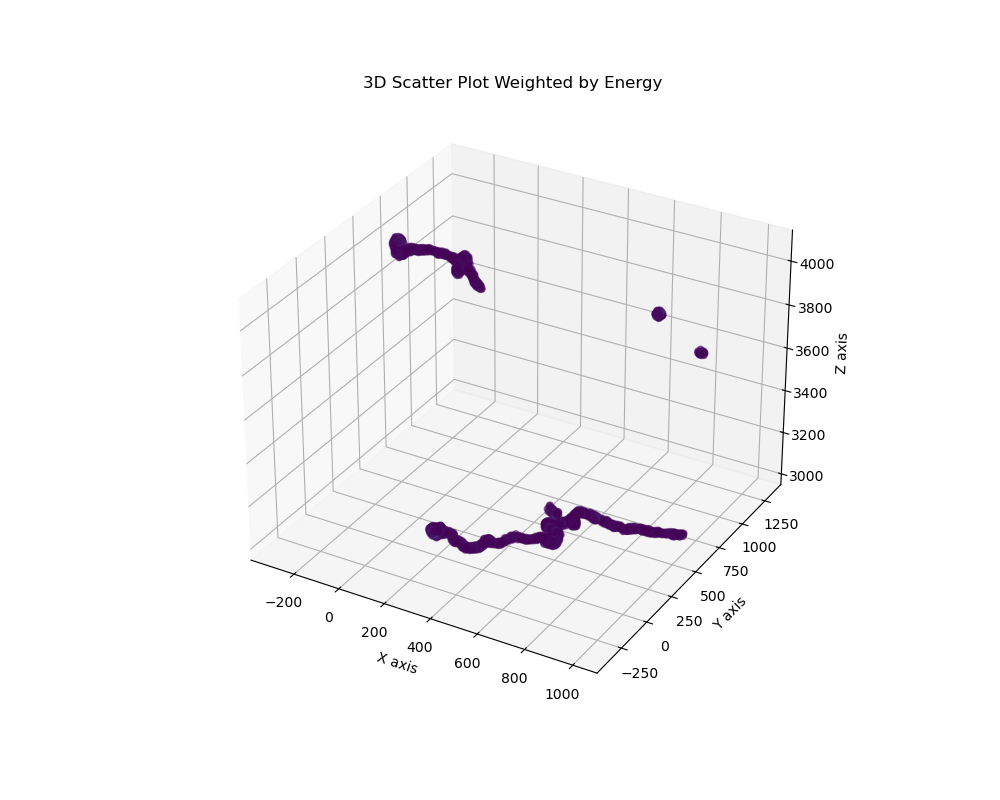

In [260]:
%matplotlib widget 

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normalize the energy values for the colors
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(data.energy.min(), data.energy.max())
colors = cmap(norm(data.energy))


# Plot the scatter plot
scatter = ax.scatter(data.x, data.y, data.z, c=colors, marker='o', alpha=0.5)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o', c="DarkOrange")

# ax.scatter(data_true['x'], data_true['y'], data_true['z']+3000, marker='o', c="DarkRed")

# Add color bar to indicate energy values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data.energy)
# cbar = plt.colorbar(mappable)
# cbar.set_label('Energy')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot Weighted by Energy')

plt.show()

In [261]:
print(data.energy.sum())

# If there are overlapping voxels, merge them. Otherwise the energy gets messed up
data = (data.groupby(["event_id", "x", "y", "z"], as_index=False)["energy"].sum())

# display(data)
data = data[['event_id','x', 'y', 'z',"energy"]]

# then sort it based on the x,y,z
data = data.sort_values(by=['x', "y", "z"]).reset_index(drop=True)

print(data.energy.sum())
display(data)

2.434864
2.434864


,event_id,x,y,z,energy
0,4536000046,-299.169281,660.83075,3976.0,0.000529
1,4536000046,-299.169281,660.83075,3984.0,0.000669
2,4536000046,-299.169281,668.83075,3976.0,0.000501
3,4536000046,-299.169281,668.83075,3984.0,0.000446
4,4536000046,-299.169281,668.83075,3992.0,0.000474
...,...,...,...,...,...
2512,4536000046,996.830750,604.83075,3048.0,0.000446
2513,4536000046,1004.830750,596.83075,3040.0,0.000418
2514,4536000046,1004.830750,596.83075,3048.0,0.000669
2515,4536000046,1004.830750,596.83075,3056.0,0.000279


In [ ]:
def Cluster(input_data, scale_factor, Diff_smear, voxel_size):

    node_centers = []
    all_visited = []
    indexes = input_data.index.values
    indexes_set = set(indexes)

    temp_dist_matrix = distance_matrix(input_data[['x', 'y', 'z']], input_data[['x', 'y', 'z']])

    for i in range(len(input_data)):

        all_visited_set = set(all_visited)

        # Convert arrays to sets and perform the difference
        filtered_indexes = list(indexes_set - all_visited_set)

        if not filtered_indexes:
            break

        # random_index = np.random.choice(filtered_indexes)
        random_index = filtered_indexes[0]

        # Calculate R based on index position
        R = scale_factor*Diff_smear*np.sqrt(0.1*data.iloc[random_index]["z"].item())

        if (R < voxel_size+4):
            R = voxel_size+4

        median, all_visited = GetMinimaWeighted(random_index, all_visited, input_data, temp_dist_matrix, R)

        node_centers.append(median)

    node_centers_df  = pd.DataFrame(node_centers, columns=['x', 'y', 'z', 'energy', "group_id"])
    node_centers_df["group_id"] = node_centers_df["group_id"].astype(int)

    return node_centers_df

# Function to get the energy weighted mean of a set of hits within a radius R. 
# Any hits that are used here will not be used again.
def GetMinimaWeighted(index, all_visited_, input_data, temp_dist_matrix, R):


    distances_from_index = temp_dist_matrix[index] # distances for node to others
    sorted_indices = np.argsort(distances_from_index) # indexes sorted by smallest distance

    closest_nodes = sorted_indices[distances_from_index[sorted_indices] < R]
    
    closest_nodes = list(set(closest_nodes) - set(all_visited_))

    selected_rows = input_data.iloc[closest_nodes] # Df containing the nodes within distance

    energy = selected_rows['energy'].values

    mean_x = np.average(selected_rows['x'].values, weights=energy)
    mean_y = np.average(selected_rows['y'].values, weights=energy)
    mean_z = np.average(selected_rows['z'].values, weights=energy)

    energy_sum = energy.sum()
    group_id   = int(selected_rows["group_id"].iloc[0])

    median_point = np.array([mean_x, mean_y, mean_z, energy_sum, group_id])

    all_visited = all_visited_ + list(closest_nodes)

    return median_point, all_visited

Mean z: 3496.6929  diffusion =  23.486503829956053
Mean Sigma:  23.486503829956053
Mean sigma group 28.43390933375149


,x,y,z,energy,group_id
0,-282.469758,675.580207,3982.715447,0.243088,0
1,-284.200101,695.631281,3989.838201,0.024431,0
2,-261.130532,645.402549,3950.626600,0.041703,0
3,-265.110172,672.346482,3991.870187,0.029223,0
4,-238.011086,633.263670,3966.098007,0.030114,0
...,...,...,...,...,...
74,930.970276,588.830750,3035.348877,0.001198,2
75,668.110310,1125.361158,3752.502306,0.118480,3
76,722.568918,-44.737568,3349.942076,0.078726,4
77,734.558777,-39.713273,3337.968162,0.013929,4


79 2.4348639477975667


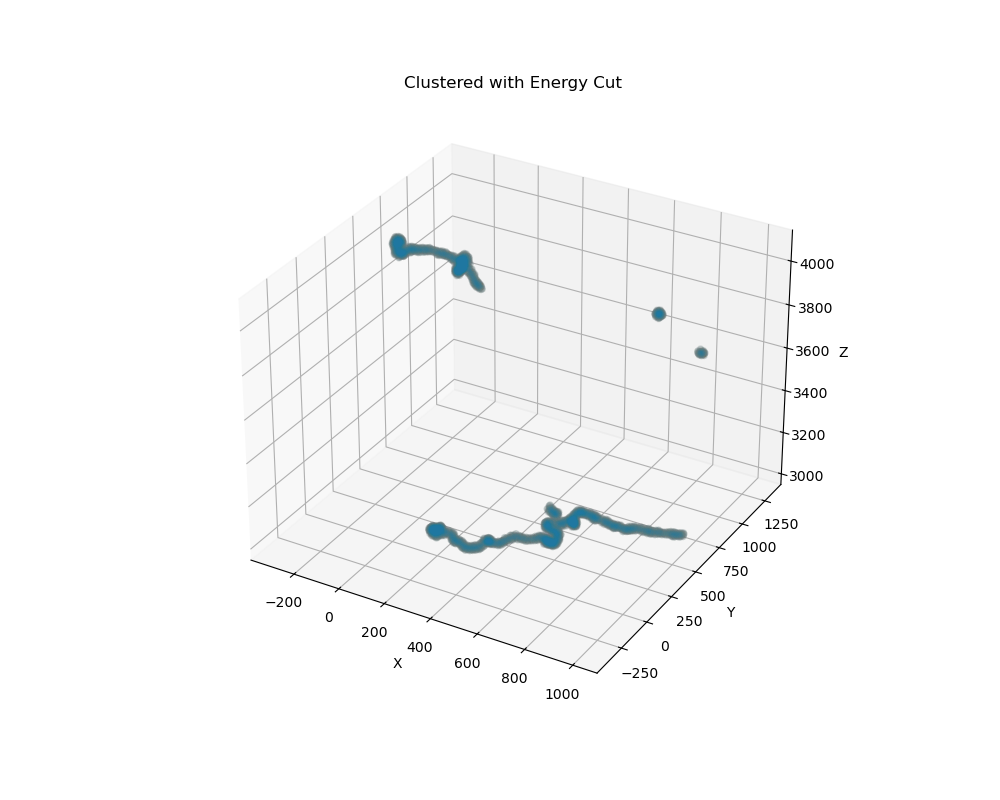

In [ ]:

# display(data)

print("Mean z:", data.z.mean(), " diffusion = ", mean_sigma)
print("Mean Sigma: ", mean_sigma)

# Apply grouping
df_merged = data.copy()

mean_sigma_group = group_sf*Diff_smear*np.sqrt(0.1*data.z.median())

if (mean_sigma_group < voxel_size+4):
    mean_sigma_group = voxel_size+4

if diffusion == "next1t":
    mean_sigma_group = 10
# elif (diffusion == "nodiff"):
#     mean_sigma_group=15
print("Mean sigma group", mean_sigma_group)

df_merged = GroupHits(df_merged, mean_sigma_group)

# Apply clustering
node_centers_df1 = []
node_centers_df = []

for gid in sorted(df_merged.group_id.unique()):
    temp_df = df_merged[df_merged.group_id == gid]
    temp_df.reset_index(drop=True, inplace=True)
    node_centers_df1.append(Cluster(temp_df, 2, Diff_smear, voxel_size))

node_centers_df1 = pd.concat(node_centers_df1, ignore_index=True)

for gid in sorted(node_centers_df1.group_id.unique()):
    temp_df = node_centers_df1[node_centers_df1.group_id == gid]
    temp_df.reset_index(drop=True, inplace=True)
    node_centers_df.append(Cluster(temp_df, diff_scale_factor, Diff_smear, voxel_size))

node_centers_df = pd.concat(node_centers_df, ignore_index=True)

display(node_centers_df)
print(len(node_centers_df), node_centers_df.energy.sum())

# -------

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Unclustered
# for gid in sorted(df_merged.group_id.unique()):
#     # ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.01)
#     # ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o')
#     temp_df = df_merged[df_merged.group_id == gid]
#     ax.scatter(temp_df['x'], temp_df['y'], temp_df['z'], marker='x')

# Clustered
for gid in sorted(node_centers_df.group_id.unique()):
    ax.scatter(df_merged['x'], df_merged['y'], df_merged['z'], marker='o',alpha=0.05)
    # ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o')
    temp_df = node_centers_df[node_centers_df.group_id == gid]
    ax.scatter(temp_df['x'], temp_df['y'], temp_df['z'], marker='x')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Clustered with Energy Cut')
plt.show()



In [264]:


databin = node_centers_df.copy()
databin["event_id"] = eid


# Now lets bin the data
databin['x_smear'] = pd.cut(x=databin['x'], bins=xbins,labels=xbin_c, include_lowest=True)
databin['y_smear'] = pd.cut(x=databin['y'], bins=ybins,labels=ybin_c, include_lowest=True)
databin['z_smear'] = pd.cut(x=databin['z'], bins=zbins,labels=zbin_c, include_lowest=True)

# Drop rows with any NaN values
databin = databin.dropna()

# Dictionary to store results
aggregated_data = {}

# Iterate through the DataFrame row by row
for _, row in databin.iterrows():
    key = (row['event_id'], row['x_smear'], row['y_smear'], row['z_smear'], row['group_id'])
    
    if key not in aggregated_data:
        # Initialize the aggregation for a new group
        aggregated_data[key] = {
            'x_sum': row['x'],
            'y_sum': row['y'],
            'z_sum': row['z'],
            'energy_sum': row['energy'],
            'group_id' : row['group_id'],
            'count': 1
        }
    else:
        # Update existing group values
        aggregated_data[key]['x_sum'] += row['x']
        aggregated_data[key]['y_sum'] += row['y']
        aggregated_data[key]['z_sum'] += row['z']
        aggregated_data[key]['energy_sum'] += row['energy']
        aggregated_data[key]['group_id'] = row['group_id']
        aggregated_data[key]['count'] += 1

# Convert aggregated data into a DataFrame
result = []
for key, values in aggregated_data.items():
    event_id, x_smear, y_smear, z_smear, group_id = key
    result.append({
        'event_id': event_id,
        'x_smear': x_smear,
        'y_smear': y_smear,
        'z_smear': z_smear,
        'x': values['x_sum'] / values['count'],   # Mean x
        'y': values['y_sum'] / values['count'],   # Mean y
        'z': values['z_sum'] / values['count'],   # Mean z
        'energy': values['energy_sum'],           # Sum energy
        'group_id' : int(group_id)
    })

# Create final DataFrame
databin = pd.DataFrame(result)

# then sort it based on the x,y,z
# databin = databin.sort_values(by=['x', "y", "z"]).reset_index(drop=True)


display(databin)


,event_id,x_smear,y_smear,z_smear,x,y,z,energy,group_id
0,4.536000e+09,-272.788815,666.671338,3992.705651,-273.789965,673.963345,3987.292817,0.272311,0
1,4.536000e+09,-272.788815,690.157842,3992.705651,-284.200101,695.631281,3989.838201,0.024431,0
2,4.536000e+09,-272.788815,643.184834,3945.732643,-261.130532,645.402549,3950.626600,0.041703,0
3,4.536000e+09,-249.302311,643.184834,3969.219147,-238.011086,633.263670,3966.098007,0.030114,0
4,4.536000e+09,-202.329304,643.184834,3992.705651,-209.031001,649.397330,3982.873533,0.033039,0
...,...,...,...,...,...,...,...,...,...
73,4.536000e+09,925.022880,596.211826,3029.758994,930.970276,588.830750,3035.348877,0.001198,2
74,4.536000e+09,666.671338,1136.401415,3757.840613,668.110310,1125.361158,3752.502306,0.118480,3
75,4.536000e+09,713.644346,-37.923777,3358.570048,722.568918,-44.737568,3349.942076,0.078726,4
76,4.536000e+09,737.130849,-37.923777,3335.083544,734.558777,-39.713273,3337.968162,0.013929,4


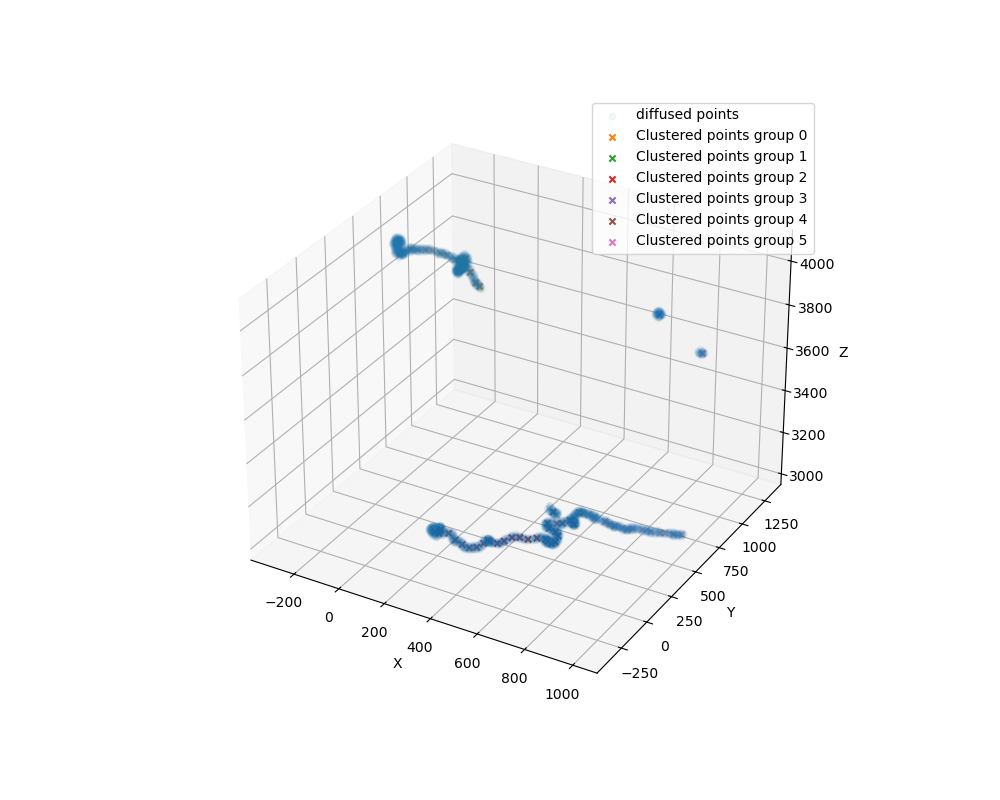

In [265]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.05, label = "diffused points")
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o',color="Teal")


for gid in sorted(databin.group_id.unique()):

    temp_df = databin[databin.group_id == gid]
    ax.scatter(temp_df['x'], temp_df['y'], temp_df['z'], marker='x', label = f"Clustered points group {gid}")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()
plt.savefig("plots/clustering/clustered_hits1.pdf")

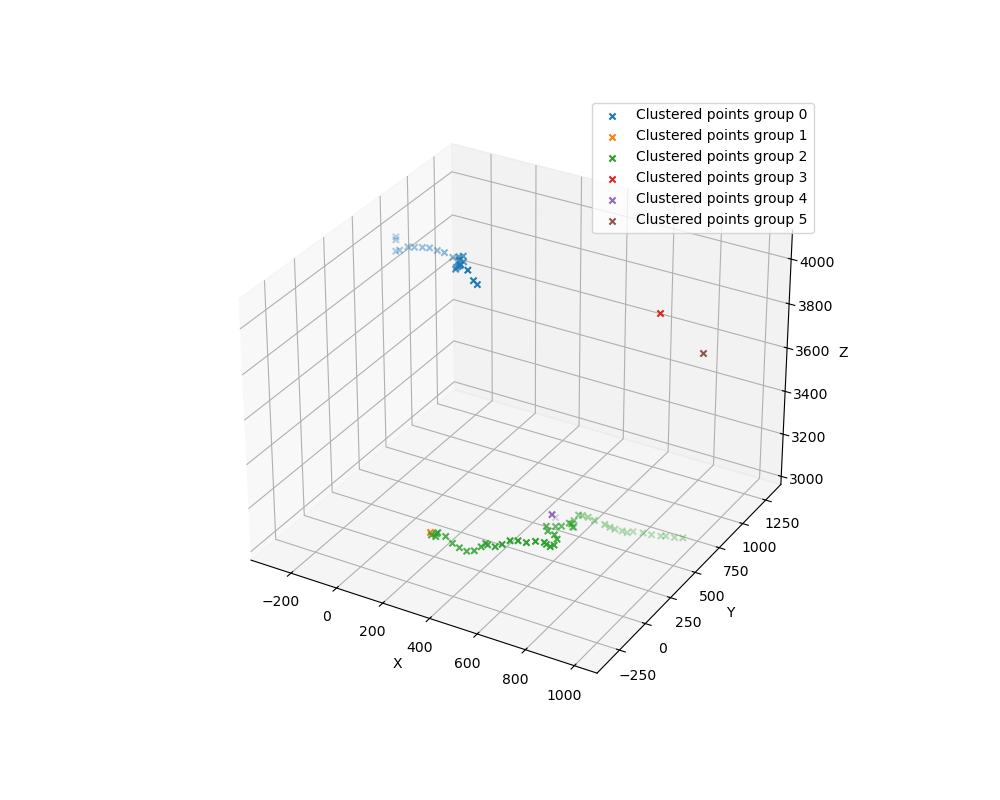

In [266]:

# Plot the original points and the polynomial fit
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for gid in sorted(databin.group_id.unique()):

    temp_df = databin[databin.group_id == gid]
    ax.scatter(temp_df['x'], temp_df['y'], temp_df['z'], marker='x', label = f"Clustered points group {gid}")

# ax.scatter(databin.x, databin.y,databin.z, color='blue', label='Clustered Points', alpha=0.5)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'],s=0.1 ,marker='o',color="Teal")

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()
plt.savefig("plots/clustering/clustered_hits2.pdf")

In [267]:
display(databin)

# databin.to_hdf("../data/test/test.h5", "MC/hits")

print(databin.energy.sum())

,event_id,x_smear,y_smear,z_smear,x,y,z,energy,group_id
0,4.536000e+09,-272.788815,666.671338,3992.705651,-273.789965,673.963345,3987.292817,0.272311,0
1,4.536000e+09,-272.788815,690.157842,3992.705651,-284.200101,695.631281,3989.838201,0.024431,0
2,4.536000e+09,-272.788815,643.184834,3945.732643,-261.130532,645.402549,3950.626600,0.041703,0
3,4.536000e+09,-249.302311,643.184834,3969.219147,-238.011086,633.263670,3966.098007,0.030114,0
4,4.536000e+09,-202.329304,643.184834,3992.705651,-209.031001,649.397330,3982.873533,0.033039,0
...,...,...,...,...,...,...,...,...,...
73,4.536000e+09,925.022880,596.211826,3029.758994,930.970276,588.830750,3035.348877,0.001198,2
74,4.536000e+09,666.671338,1136.401415,3757.840613,668.110310,1125.361158,3752.502306,0.118480,3
75,4.536000e+09,713.644346,-37.923777,3358.570048,722.568918,-44.737568,3349.942076,0.078726,4
76,4.536000e+09,737.130849,-37.923777,3335.083544,734.558777,-39.713273,3337.968162,0.013929,4


2.4348639477975667


Diffussion smear is:  0.314 mm/sqrt(cm)
Energy threshold is:  0.2 keV
diffision scale factor is:  4
Radius scale factor is:  7
Hit grouping factor is:  5
Tortuosity distance scale is: 105.0
The voxel size is: 8
The det half_length is:  3091.169274839764
Median distance to the closest row: 30.512254430172696
Distances to iterate over [  1  16  31  46  61  76  92 107 122 137 152 168 183 198 213]
Dist Thresh 136.512
Pass Flag: True
The primary track is:  0
        event_id           x           y            z  group_id    energy  id  \
0   4.536000e+09  355.363491 -342.089681  3269.731743         2  0.190019  25   
1   4.536000e+09  373.601909 -342.449199  3268.887349         2  0.023986  27   
2   4.536000e+09  377.846341 -332.635163  3284.049294         2  0.033903  28   
3   4.536000e+09  367.624491 -322.202795  3270.452172         2  0.059031  26   
4   4.536000e+09  402.300972 -314.441158  3266.445845         2  0.023874  29   
..           ...         ...         ...          ...   

,event_id,x,y,z,group_id,energy,id,primary,trkID,cumulative_distance,angle,Tortuosity,Squiglicity
id,,,,,,,,,,,,,
25,4.536000e+09,355.363491,-342.089681,3269.731743,2,0.190019,25,1,0,0.000000,0.000000,1.695469,0.750272
27,4.536000e+09,373.601909,-342.449199,3268.887349,2,0.023986,27,1,0,18.261493,123.109603,1.695469,0.750272
28,4.536000e+09,377.846341,-332.635163,3284.049294,2,0.033903,28,1,0,36.814528,79.613796,1.523074,0.708594
26,4.536000e+09,367.624491,-322.202795,3270.452172,2,0.059031,26,1,0,56.769534,113.421368,1.389830,0.554959
29,4.536000e+09,402.300972,-314.441158,3266.445845,2,0.023874,29,1,0,92.529175,107.873533,1.332253,0.538780
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,4.536000e+09,131.812294,480.247797,4037.641507,0,0.016631,21,0,4,732.598654,82.156599,1.336142,0.560144
22,4.536000e+09,156.268223,478.946803,3998.830412,0,0.024961,22,0,4,778.490769,30.142121,1.020814,0.123327
23,4.536000e+09,168.559723,487.779237,3981.745372,0,0.010280,23,0,4,801.316006,24.629566,1.020814,0.123327


78 78


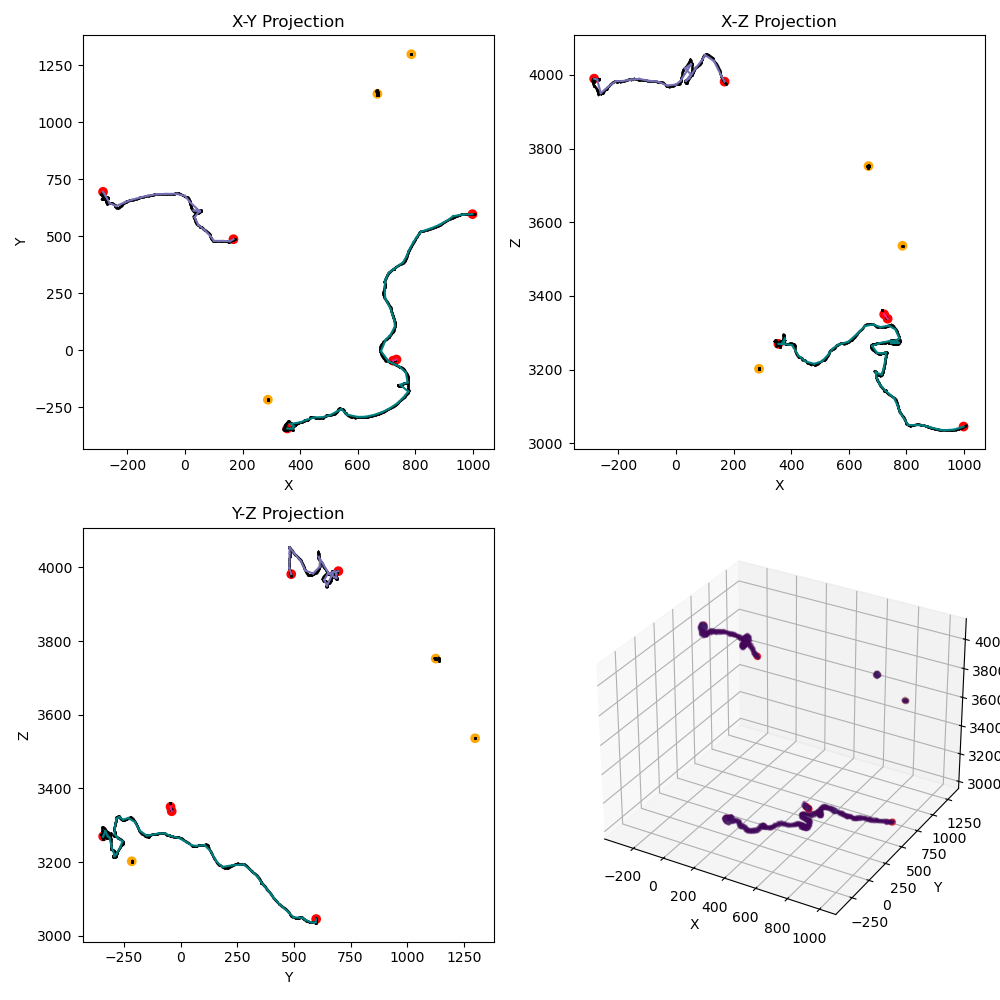

In [268]:
# Apply the tracking reconstruction

# df, Tracks, connected_nodes, connection_count, pass_flag = RunTracking(databin[["event_id", "x", "y", "z", "energy"]], 0, 1, "5percent", 0)
df, Tracks, connected_nodes, connection_count, pass_flag, contained = RunTracking(databin, 0, pressure, diffusion, 0)
if (not pass_flag):
    print("Error in track reco, try resorting hits\n")
    df, Tracks, connected_nodes, connection_count, pass_flag, contained = RunTracking(databin, 0, pressure, diffusion, 1)
if (not pass_flag):
    print("Error in track reco, try resorting hits\n")
    df, Tracks, connected_nodes, connection_count, pass_flag, contained = RunTracking(databin, 0, pressure, diffusion, 2)

df.index = df.id

display(df)
print(len(df.x), len(df.z))

# Create subplots
fig = plt.figure(figsize=(10, 10))

axs = [fig.add_subplot(2, 2, i + 1) for i in range(3)]

# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
# axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)
axs[0].scatter(data_true['x'], data_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
# axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)
axs[1].scatter(data_true['x'], data_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
# axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
axs[2].scatter(data_true['y'], data_true['z'], marker='o',c="k", s=0.1)


# 3D Projection
ax_3D = fig.add_subplot(2, 2, 4, projection='3d')
plot_tracks_3D(ax_3D, df['x'], df['y'], df['z'], connection_count, Tracks)
# ax_3D.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o',c="k", s=0.1)
# ax_3D.scatter(data.x, data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
ax_3D.scatter(df_merged.x, df_merged.y, df_merged.z, c=df_merged.energy, marker='o', alpha=0.2,s=3)
ax_3D.set_title("")


plt.tight_layout()
plt.show()

In [269]:
if (diffusion == "next1t"):
    temp_meta = GetTrackdf(df, Tracks, 30, 15, 15, pressure)
else:
    temp_meta = GetTrackdf(df, Tracks, 500/pressure, 180/pressure, 200/pressure, pressure) # scale these params inversely with the pressure

display(temp_meta)
# temp_meta = UpdateTrackMeta(temp_meta, df, 100/pressure) # Merge deltas and brems that are near the blobs in the metadata
temp_meta = UpdateTrackMeta2(temp_meta)
temp_meta["contained"] = contained
display(temp_meta)

,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label
0,4.536000e+09,0,1,25,77,1683.906,1.329351,0.563927,0.266628,0.437341,0.079033,0.437341,0.079033,1.402332,1.045954,0.625583,0.243167,Primary
0,4.536000e+09,1,0,24,24,0.000,0.063934,0.063934,0.063934,0.063934,0.063934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem
0,4.536000e+09,2,0,40,40,0.000,0.118480,0.118480,0.118480,0.118480,0.118480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem
0,4.536000e+09,3,0,68,68,0.000,0.030922,0.030922,0.030922,0.030922,0.030922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem
0,4.536000e+09,4,0,0,23,801.316,0.799522,0.338446,0.051871,0.338446,0.051871,0.000000,0.000000,1.304277,1.125924,0.523892,0.268933,Brem
0,4.536000e+09,5,0,53,57,17.674,0.092655,0.078726,0.013929,0.078726,0.013929,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained
0,4.536000e+09,0,1,25,77,1683.906,1.329351,0.563927,0.266628,0.437341,0.079033,0.437341,0.079033,1.402332,1.045954,0.625583,0.243167,Primary,True
0,4.536000e+09,1,0,24,24,0.000,0.063934,0.063934,0.063934,0.063934,0.063934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True
0,4.536000e+09,2,0,40,40,0.000,0.118480,0.118480,0.118480,0.118480,0.118480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True
0,4.536000e+09,3,0,68,68,0.000,0.030922,0.030922,0.030922,0.030922,0.030922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True
0,4.536000e+09,4,0,0,23,801.316,0.799522,0.338446,0.051871,0.338446,0.051871,0.000000,0.000000,1.304277,1.125924,0.523892,0.268933,Brem,True
0,4.536000e+09,5,0,53,57,17.674,0.092655,0.078726,0.013929,0.078726,0.013929,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,True


Text(0, 0.5, 'Angle')

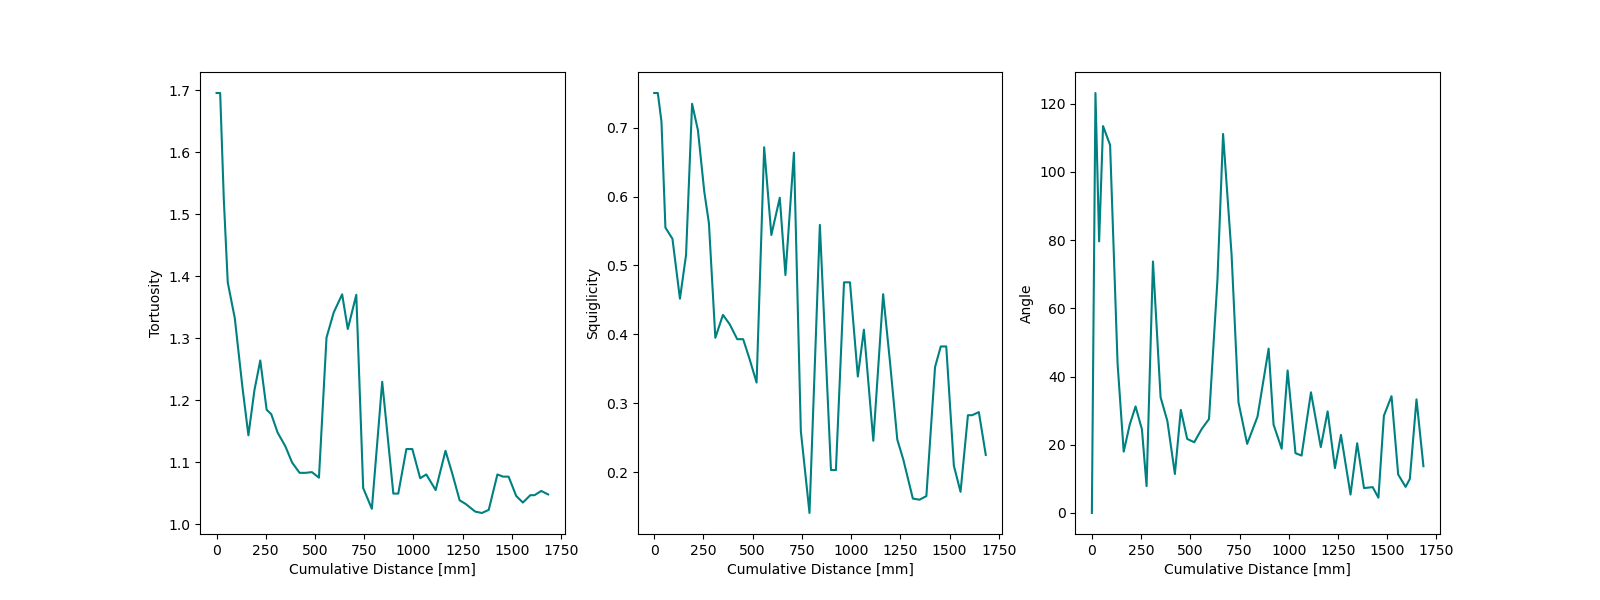

In [270]:

fig, axs = plt.subplots(1, 3, figsize=(16, 6))

axs[0].plot(df[df.primary == 1].cumulative_distance, df[df.primary == 1]["Tortuosity"], c="Teal")
axs[0].set_xlabel("Cumulative Distance [mm]")
axs[0].set_ylabel("Tortuosity")

axs[1].plot(df[df.primary == 1].cumulative_distance, df[df.primary == 1]["Squiglicity"], c="Teal")
axs[1].set_xlabel("Cumulative Distance [mm]")
axs[1].set_ylabel("Squiglicity")


axs[2].plot(df[df.primary == 1].cumulative_distance, df[df.primary == 1]["angle"], c="Teal")
axs[2].set_xlabel("Cumulative Distance [mm]")
axs[2].set_ylabel("Angle")